In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, Dropout
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.callbacks import Callback, EarlyStopping
from tensorflow.keras.layers import BatchNormalization

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode="coarse") 

In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = to_categorical(y_train, num_classes=20)
y_test = to_categorical(y_test, num_classes=20)

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [14]:
superclass_model = Sequential()

superclass_model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
superclass_model.add(BatchNormalization())
superclass_model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
superclass_model.add(BatchNormalization())
superclass_model.add(MaxPooling2D((2, 2)))
superclass_model.add(Dropout(0.3))
superclass_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
superclass_model.add(BatchNormalization())
superclass_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
superclass_model.add(BatchNormalization())
superclass_model.add(MaxPooling2D((2, 2)))
superclass_model.add(Dropout(0.4))
superclass_model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
superclass_model.add(BatchNormalization())
superclass_model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
superclass_model.add(BatchNormalization())
superclass_model.add(MaxPooling2D((2, 2)))
superclass_model.add(Dropout(0.5))
superclass_model.add(Flatten())
superclass_model.add(Dense(1024, activation='relu', kernel_regularizer=l2(1e-4)))
superclass_model.add(Dropout(0.5))
superclass_model.add(Dense(20, activation='softmax')) 

optimizer = Adam(learning_rate=0.0001)
superclass_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

superclass_model.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                      

In [12]:
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)

batch_size = 50
epochs = 100

history = superclass_model.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    validation_data=(x_test, y_test),
    epochs=epochs,
    callbacks=[early_stopping],
    steps_per_epoch=x_train.shape[0] // batch_size,
    verbose=1
)


Epoch 1/100
1000/1000 [==============================] - 377s 374ms/step - loss: 3.1462 - accuracy: 0.1502 - val_loss: 2.6469 - val_accuracy: 0.2489
Epoch 2/100
1000/1000 [==============================] - 382s 382ms/step - loss: 2.6672 - accuracy: 0.2278 - val_loss: 2.6461 - val_accuracy: 0.2746
Epoch 3/100
1000/1000 [==============================] - 368s 368ms/step - loss: 2.5191 - accuracy: 0.2725 - val_loss: 2.4514 - val_accuracy: 0.3178
Epoch 4/100
1000/1000 [==============================] - 356s 356ms/step - loss: 2.4102 - accuracy: 0.3061 - val_loss: 2.3562 - val_accuracy: 0.3342
Epoch 5/100
1000/1000 [==============================] - 354s 354ms/step - loss: 2.3054 - accuracy: 0.3352 - val_loss: 2.2897 - val_accuracy: 0.3466
Epoch 6/100
1000/1000 [==============================] - 357s 357ms/step - loss: 2.2118 - accuracy: 0.3599 - val_loss: 2.1792 - val_accuracy: 0.3815
Epoch 7/100
1000/1000 [==============================] - 348s 348ms/step - loss: 2.1150 - accuracy: 0.3892

In [ ]:
from tensorflow.keras.models import load_model
model.save('model2.keras')

In [5]:
from tensorflow.keras.models import load_model
superclass_model =load_model('model2.keras')

In [15]:
test_loss, test_acc = superclass_model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

313/313 - 27s - loss: 0.9490 - accuracy: 0.7570 - 27s/epoch - 86ms/step
Test Accuracy: 75.70%


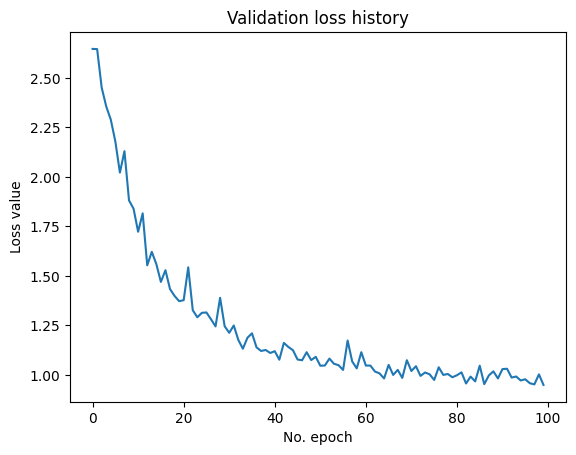

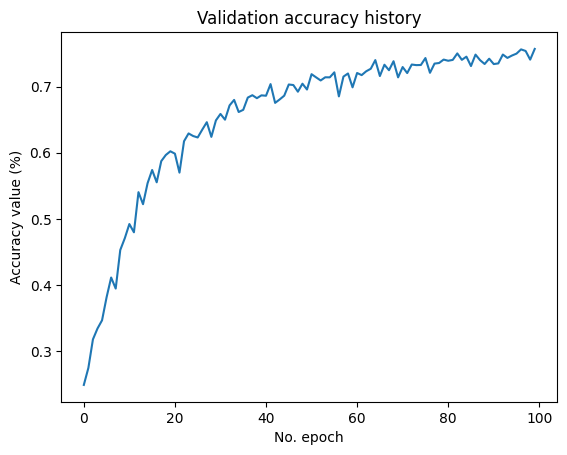

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()